In [22]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


<hr/>
# Prob2 : Performance results
<hr/>

This note book assumes that you have run your code for processor counts $[1,2,4,8]$ and have files `trap_1.out`, `trap_2.out` and so on. 

First, we create a Panel of data collecting everything in the files you just created. 

In [23]:
import numpy, pandas

file_prefix = 'trap_'

pdata = {}
nprocs = [1,2,4,8, 16]
for p in nprocs:
    fname = file_prefix + '{:02d}'.format(p) + '.out'
    try:
        df = pandas.read_table(fname,names=['N','soln','err','t'],delim_whitespace=True)        
    except:
        print("File '{:s}' not found.".format(fname))
    else:
        tname = 'p' + '{:02d}'.format(p)       
        pdata[tname] = df
        
    
panel = pandas.Panel(pdata)

We can index panels as dictionaries. 

In [24]:
panel['p02']

N      soln           err        t
0        1024.0  1.872592  4.677800e-07  0.01200
1        2048.0  1.872593  1.169500e-07  0.01010
2        4096.0  1.872593  2.923600e-08  0.00973
3        8192.0  1.872593  7.309100e-09  0.01040
4       16384.0  1.872593  1.827300e-09  0.01740
5       32768.0  1.872593  4.568100e-10  0.01090
6       65536.0  1.872593  1.141900e-10  0.01230
7      131072.0  1.872593  2.855400e-11  0.01340
8      262144.0  1.872593  7.137600e-12  0.01900
9      524288.0  1.872593  1.785500e-12  0.02790
10    1048576.0  1.872593  4.822800e-13  0.04170
11    2097152.0  1.872593  6.483700e-14  0.07970
12    4194304.0  1.872593  3.352900e-14  0.14300
13    8388608.0  1.872593  1.509900e-14  0.27600
14   16777216.0  1.872593  1.176800e-14  0.54000
15   33554432.0  1.872593  5.628800e-13  1.06000
16   67108864.0  1.872593  4.041200e-13  2.11000
17  134217728.0  1.872593  1.521400e-12  4.64000
18  268435456.0  1.872593  7.975400e-12  8.63000

We can also look at different slice of data.  For example, suppose we wanted to check our results across all processors for N=16384.  This corresponds to index value 4 (see above).  The N axis is the major axes, and so we can look across the "cubed" panel data using 

    panel.major_xs(4)    # Corresponds to N = 16384
    
Then, we look to see that we have virtually identical error results across all processors. Note that we transpose the data so that header labels are across the top.

In [25]:
panel.major_xs(4).transpose()    # Choose layers of N values

N      soln           err        t
p01  16384.0  1.872593  1.827300e-09  0.00916
p02  16384.0  1.872593  1.827300e-09  0.01740
p04  16384.0  1.872593  1.827300e-09  0.01110
p08  16384.0  1.872593  1.827300e-09  0.17100
p16  16384.0  1.872593  1.827300e-09  0.35200

We could also slice along the minor axis to see the timing results across all processors for our range of N values.

In [26]:
panel.minor_xs('t') 

p01      p02     p04    p08    p16
0    0.01040  0.01200  0.0130  0.158  0.353
1    0.00854  0.01010  0.0185  0.206  0.352
2    0.00922  0.00973  0.0110  0.219  0.392
3    0.00915  0.01040  0.0177  0.221  0.371
4    0.00916  0.01740  0.0111  0.171  0.352
5    0.01070  0.01090  0.0111  0.182  0.403
6    0.01290  0.01230  0.0119  0.182  0.375
7    0.01740  0.01340  0.0524  0.224  0.390
8    0.02810  0.01900  0.0153  0.150  0.379
9    0.04160  0.02790  0.0241  0.162  0.431
10   0.07470  0.04170  0.0287  0.174  0.406
11   0.14400  0.07970  0.0755  0.214  0.478
12   0.26800  0.14300  0.0818  0.313  0.491
13   0.52600  0.27600  0.1530  0.375  0.557
14   1.03000  0.54000  0.3100  0.583  0.758
15   2.07000  1.06000  0.6410  0.978  1.060
16   4.11000  2.11000  1.1700  1.560  1.570
17   8.13000  4.64000  2.3000  2.500  2.860
18  12.90000  8.63000  4.5700  4.820  5.020

## Plot timing results

Using the Panel, we can easily plot all of the timing results in a single plot.  

Text(0,0.5,'Time (s)')

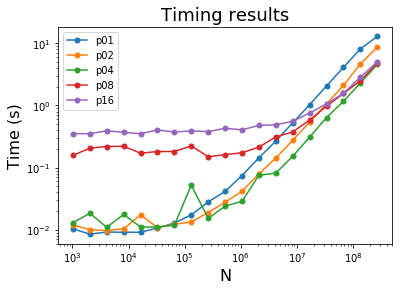

In [27]:
df_timing = panel.minor_xs('t') 
cols = ['N',*df_timing.columns]


df_timing['N'] = panel['p01']['N'].astype('int')
df_timing = df_timing[cols]
df_timing.plot(x='N',logx=True,logy=True,style='.-',markersize=10)

title("Timing results",fontsize=18);
xlabel("N",fontsize=16)
ylabel("Time (s)",fontsize=16)

<hr/>

## Strong scaling

If an algorithm scales well, we expect that adding more processors to a problem of fixed size should speed up the calculation.  If a code were "embarrassingly parallel", we expect two processors to take half as much time as one processor, 4 processors to take a quarter of the time, and so on.  We call this type of scaling "strong" scaling.  

For strong scaling, we compare timings for a fixed value of $N$.   We will choose one of the larger values to see better results.

In [28]:
idx = 18    # Choose N corresponding to index=18
N = int(panel['p01']['N'][idx])

procs = array([1,2,4,8,16])

df_strong = panel.major_xs(idx).transpose()    
df_strong['p'] = procs
df_strong[['p','soln','err','t']].style.set_caption("N = {:d}".format(N))

Plot the strong scaling results and show the best-fit line to get an estimate of the speed-up.  

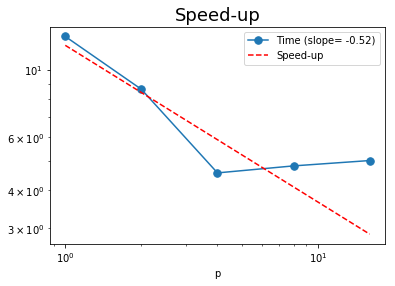

In [29]:
df_strong.plot(x='p',y='t',logx=True,logy=True,style='.-',markersize=15)

# Plot best-fit speed-up line
t_strong = array(df_strong['t'])
c = polyfit(log(procs[:-1]),log(t_strong[:-1]),1)
loglog(procs,exp(polyval(c,log(procs))),'r--')

legend(['Time (slope={:6.2f})'.format(c[0]),'Speed-up'])
title('Speed-up',fontsize=18);

## Weak scaling

If an algorithm scales well, we expect to be able to solve bigger problems by adding more processors.  For example, if we double the size of the problem, and double the number of processors, we expect the code to take the same time as the original problem.  This sort of scaling is called "weak scaling".  

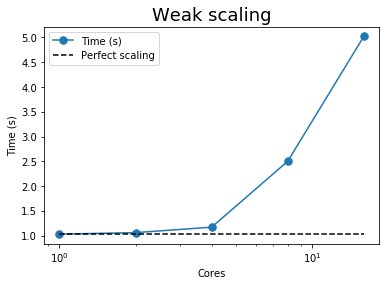

In [31]:
figure()
clf()
df_weak = panel.minor_xs('t')
idx = 14     # Start with 'N' index;  shift by one as we increase the processor count

t_weak = array([df_weak[c][14+i] for i,c in enumerate(df_weak.columns)])

semilogx(procs,t_weak,'.-',markersize=15)
semilogx(procs,[t_weak[0]]*5,'k--')
title('Weak scaling', fontsize=18)
xlabel('Cores')
ylabel("Time (s)")
legend(['Time (s)','Perfect scaling'])

## Efficiency

When we add more processors, we expect some overhead associated with more communication.  This is captured somewhat in the weak scaling results, but what is not shown is how quickly the efficiency drops off.  

Efficiency plots can often highlight poor scaling reslts that are not obvious from strong scaling results.

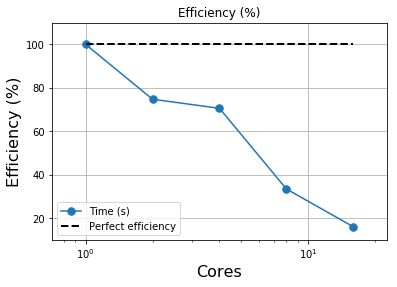

In [32]:
figure()
clf()

# Efficiency
E = t_strong[0]/(procs*t_strong)*100

semilogx(procs,E,'.-',markersize=15)
semilogx(procs,[100]*5,'k--',linewidth=2)

xlabel('Cores',fontsize=16)
ylabel('Efficiency (%)',fontsize=16)
title("Efficiency (%)");
legend(['Time (s)', 'Perfect efficiency'])
xlim([1/sqrt(2), 2**4.5])
ylim([10,110])
grid()